In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
putih = cv2.imread('/content/putihputih.jpg')

In [ ]:
def render_image(image):
    plt.figure(figsize = (8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

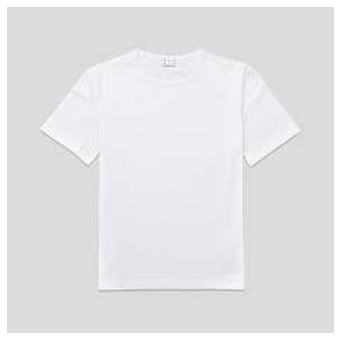

In [ ]:
render_image(convert_to_RGB(putih))

In [ ]:
lab= cv2.cvtColor(putih, cv2.COLOR_BGR2LAB)

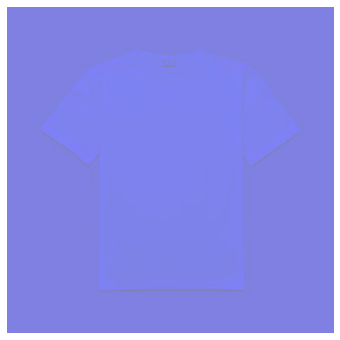

In [ ]:
render_image(convert_to_RGB(lab))

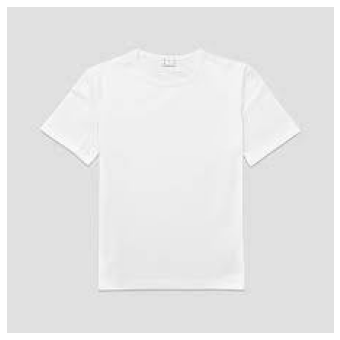

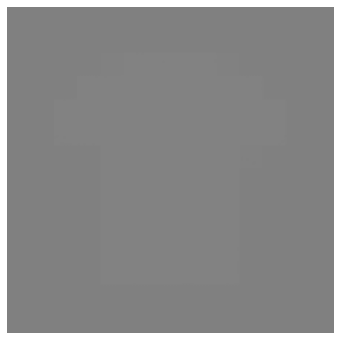

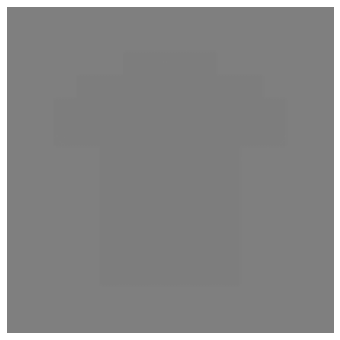

In [ ]:
l, a, b = cv2.split(lab)
render_image(convert_to_RGB(l))
render_image(convert_to_RGB(a))
render_image(convert_to_RGB(b))

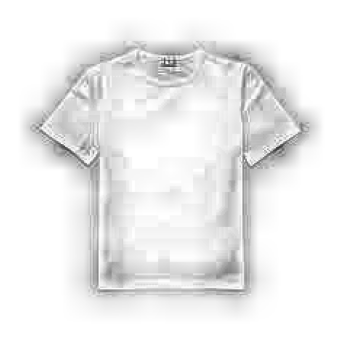

In [ ]:
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(16, 16))
cl = clahe.apply(l)
render_image(convert_to_RGB(cl))

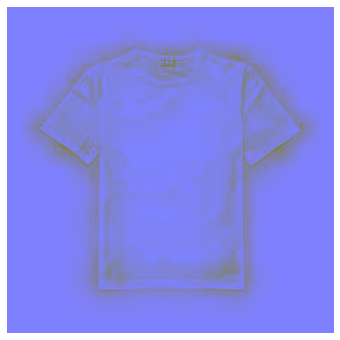

In [ ]:
limg = cv2.merge((cl,a,b))
render_image(convert_to_RGB(limg))

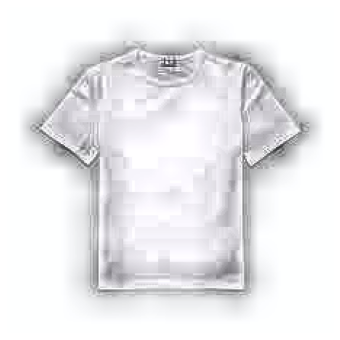

In [ ]:
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
render_image(convert_to_RGB(final))

In [ ]:
cv2.imwrite('blabla.jpg',final)

True

In [ ]:
def get_threshold(gray_image, type):
    if type == 'dark':
        return cv2.threshold(gray_image, 115, 255, cv2.THRESH_BINARY_INV)[1]
    elif type == 'light':
        return cv2.threshold(gray_image, 75, 255, cv2.THRESH_BINARY)[1]

def detect_object(image_path, type):
    image = cv2.imread(image_path)
    gray = convert_to_grayscale(image)
    
    thresh = get_threshold(gray, type)
    
    # Create a small matrix
    kernel = np.ones((5,5),np.uint8)
    
    # Use the kernel to perform morphological opening
    
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    # Find the contours
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    # Create a blank image
    blank_image = np.ones((450,600,3), np.uint8)
    
    # Set the minimum area for a contour
    min_area = 5000
    
    # Draw the contours on the original image and the blank image
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area:
            cv2.drawContours(image,[c], 0, (36,255,12), 2)
            cv2.drawContours(blank_image,[c], 0, (255,255,255), 2)
        
    print(cnts)
    
    # Convert the blank image to grayscale for corner detection
    gray = convert_to_grayscale(blank_image)
    
    # Detect corners using the contours
    corners = cv2.goodFeaturesToTrack(image=gray,maxCorners=25,qualityLevel=0.20,minDistance=50) # Determines strong corners on an image
    
    # Draw the corners on the original image
    for corner in corners:
        x,y = corner.ravel()
        cv2.circle(image,(x,y),10,(0,0,255),-1)
    
    # Display the image
    render_image(convert_to_RGB(image))
    render_image(convert_to_RGB(blank_image))
    
    # Save the image that has the contours and corners
    contour_image_filename = 'contour' + image_path
    cv2.imwrite(contour_image_filename, image)
    
    # Save the image that has just the contours
    contour_blank_image_filename = 'contour' + image_path + 'blank'
    cv2.imwrite(contour_blank_image_filename, blank_image)

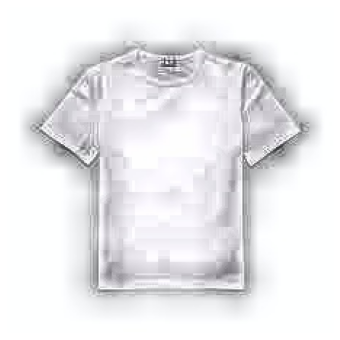

In [ ]:
putih2 = cv2.imread('blabla.jpg')
render_image(convert_to_RGB(putih2))

In [ ]:
detect_object('putihputih.jpg', 'dark')

[]


TypeError: ignored